# API-201 ABC REVIEW SESSION #2
**Friday, September 16**

# Table of Contents
1. [Transition to Google Colab](#Transition-to-Google-Colab)
1. [Exercises](#Exercises)

# Transition to Google Colab

HW3 will be the first problem set you solve in [Google Colaboratory](https://colab.research.google.com/), a Google-hosted Jupyter notebooks service. All R code runs the same in these notebooks as they did on FAS OnDemand, but there are some subtle differences in the interface. 

Throughout this session, we will include notes related to differences between this interface and the FAS OnDemand interface. Also, please do not hesitate to use the [#r channel on Slack](https://api-201-2022.slack.com/archives/C03Q35HVDNF) with additional questions related to using these notebooks as they arise. We apologize for the frustration associated with these changes, and hope this change makes working with Notebooks smoother from now on.

##  Instructions 

1. Create a copy of this Jupyter notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!***
1. Remember to save your work frequently by pressing `command-S` of clicking `File > Save and Checkpoint` in the menubar.
1. We recommend completing the exercises in Google Chrome.


## Adding images

If you would like to insert an image of your handwriting to show your work, click on the `+ Text` button at the top of this window to create a new cell. Then click the small image icon in the text cell's menubar, and add your image. 

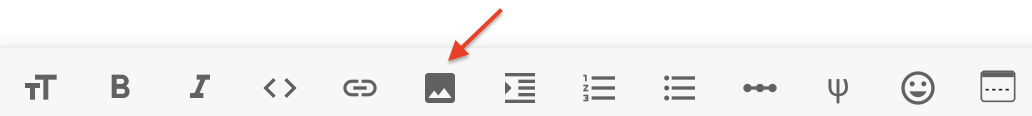

When you do this, your text cell will become filled with a string of letters and numbers - don't panic! Just press the `esc` key on your keyboard to exit out of the cell and show the image (you can double click the image above to see what it will look like; press `esc` to exit out of it). We recommend creating a new text cell for each image you have to insert to make it easier to navigate your notebook (if you're interested in knowing what's happening, Google is actually encoding your image as text in [base64](https://www.keycdn.com/support/image-base64-encoding)).

If your image file is large (> 1.5 MB or so), your browser tab may get stuck and reload itself. If you find yourself encountering this issue, you can go to website [Freeimage.host](https://freeimage.host/) and upload the image there. It will then provide you with some code to copy a link - copy the code for "Markdown full linked" and paste it into the text cell. Here's an example:

[![PUZYEG.md.png](https://iili.io/PUZYEG.md.png)](https://freeimage.host/i/PUZYEG)

# Exercises

# Exercise 1: Predicting default risk in Microfinance

The goal of this question is to use statistics to better understand default risk prediction. In micro-lending markets, lack of recorded credit history is a significant impediment to assessing individual borrowers’ creditworthiness and therefore deciding whether to lend or not and at what interest rate.

Banks can use machine learning techniques to incorporate information on individual's characteristics to determine whether a loan applicant has a *High* or *Low* risk of default ([source](https://www.record-evolution.de/en/blog/credit-default-risk-prediction/)). If we want to evaluate whether the model is doing a good job at predicting default, we can compare default rates of old clients classified as of high or low risk. 

In this exercise, we will analyze the performance of a prediction model for default risk in the context of micro borrowers in Ghana ([source](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3506597)). Assume that researchers find that  the model has a specificity $(P(Low | Not Default)$ of 70%) and a sensitivity $(P(High | Default))$ of 80%), and suppose that the proportion of default in this community is 15%.



### 0. Bayes Rule 

Yesterday we learned how to use Bayes Rule to calculate conditional probabilities. **Conditional probability** is the likelihood of an outcome occurring, based on a previous outcome having occurred in similar circumstances. Bayes' theorem provides a way to revise existing predictions or theories (update probabilities) given new or additional evidence.

In the mammograms example:
1. What is our prior?
2. What is the new information?
3. What is our posterior?

Consider two sets, A and B. As you can see, they are not mutually exclusive. The sample space is given by $S=A \cup B$.

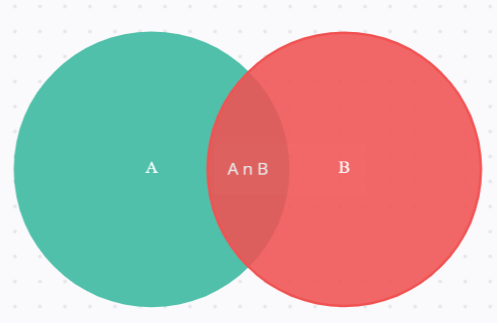

What happens when we change our sample space from S to B? What is the new probability of getting A?

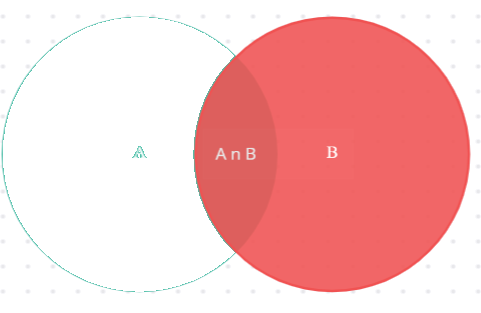

Deriving Bayes Rule

\begin{align*}
P(A│B) &= \frac{P(A \& B)}{P(B)} \\
P(A│B) &= \frac{P(B│A)*P(A)}{P(B)} \\
P(A|B) &= \frac{P(B│A)*P(A)}{P(B \& A) + P(B \& A^C)} \\
P(A|B) &= \frac{P(B│A)*P(A)}{P(B│A)*P(A)+P(B│A^C)*P(A^C)} 
\end{align*}

*Check [this website](https://medium.com/analytics-vidhya/bayes-theorem-using-venn-diagrams-681b71ac450d) for more intuition on the Bayes theorem.*

### 1. Calculating probabilities

**a. Suppose that a random person from this population is identified as High risk by the model. Calculate the probability that the person defaults (i.e. P(Default|High)). This number is sometimes called the “positive predictive value”.**


`Your answer here!`

##### START

First let’s write down everything we know from the question in probability notation: 

\begin{align*}
P(High|Default) &= 0.8 \\
P(Low│Default) &= 1-0.8=0.2 \\
P(Low│Default^C ) &= 0.7 \\
P(High│Default^C ) &= 1- 0.7 =0.3 \\
P(Default) &= 0.15 \\
P(Default^C ) &= 1-0.15 = 0.85
\end{align*}

Now let’s calculate all 4 joint probabilities, so we can fill in a 2x2 probability table: 
\begin{align*}
P(Default \& High) &= P(High | Default ) * P(Default)=0.8 * 0.15=0.12 \\
P(Default \& Low) &= P(Low | Default ) * P(Default) = (1-0.8) * 0.15 = 0.03 \\ 
P(Default^C  \& High) &= P(High | Default^C) * P(Default^C) = (1-0.7) * 0.85 = 0.255 \\
P(Default^C  \& Low) &= P(Low | Default^C) * P(Default^C) = 0.7 * 0.85=0.595
\end{align*}

The probability table shows both the decimal probability and how many people this would represent (rounded to whole numbers) out of 1,000 people. As we can see from the table, we would expect the vast majority (975/1000) of individuals to fall in the bottom-right quadrant, meaning that they are low risk and don't default.

|  | $Default$ | $Default^C$ | Row sums
| --- | --- | --- | --- 
| High | 0.12=120 people  |  0.255 = 255 people | 0.375 = 375 people
| Low | 0.03=30 people |  0.595 = 595 people | 0.625 = 625 people
| Col sums | 0.15 = 150 people |  0.850 = 850 people  | 1 = 1,000 people

The question tells us that the model predicted High risk. So we know this case falls in either the top left or top right quadrants of the 2x2 probability table above. Now we are ready to calculate the probability that this person defaults, given that the model identified them as high risk: 
\begin{align*}
P(Default |High) &=  \frac{P(Default \& High)}{P(High)}  \\
 &=  \frac{\text{top left quadrant}}{\text{top left quadrant + top right quadrant}}  \\
 &=  \frac{0.12}{0.12+0.255}  = 0.320 
\end{align*}

Instead of writing the probability table, we can apply Bayes’ rule to calculate $P(Default│High)$. Recall that:

\begin{align*}
P(A│B) =& \frac{P(B│A)*P(A)}{P(B│A)*P(A)+P(B│A^C)*P(A^C)} 
\end{align*}

In this case:
\begin{align*}
P(Default│High) &= \frac{P(High│Default)*P(Default)}{P(High│Default)*P(Default)+P(High|Default^C )*P(Default^C)} \\
 &= \frac{0.8*0.15}{0.8*0.15+(1-0.7)*(1-0.15)}  =0.320
\end{align*}


##### END

**b. Suppose the model identifies an individual as at high risk of default.  Calculate the probability that the person does not Default (i.e. $P(Default^C|Low)$). This number is sometimes called the “negative predictive value".**

`Your answer here!`

##### START

As above, there are a range of ways to compute this, including writing out a probability table or applying Bayes’ rule directly.

\begin{align*}
P(Default^C│Low) &= \frac{P(Default^C \& Low)}{P(Low)} \\
             &= \frac{P(Low│Default^C )*P(Default^C )}{P(Low│Default^C )*P(Default^C )+P(Low|Default)*P(Default)} \\
             &= \frac{0.7*0.85}{0.7*0.85+0.2*0.15}  =0.952
\end{align*}

##### END

### 2. Simulating probabilities

Instead of using math, we can answer these questions via simulation. We are going to break this question into several parts and then calculate conditional probabilities running simulations.**

We want to: 
<br> i) Generate a dataframe with 1,000,000 rows. 
<br> ii) In column 1, randomly assign default status.
<br> iii) In column 2, randomly assign high risk status given the default status from column 1.

Run the cell below, which assigns parameters that will be used to create the simulated data. In the subsequence steps, you can simply reference the variable instead of the number (for example, instead of typing `0.15` you can just type `default_rate`)

In [1]:
library(tidyverse)
        
# Parameters

## Number of observations 
n <- 1e6

## Default rate
default_rate <- 0.4

# Probability of being identified as High risk given that the person defaults
prob_high_given_defaultyes <- 0.8

# Probability of being identified as High given that the person does not Default: 1-P(Low|Default^C)
prob_high_given_defaultno <- 1 - 0.7

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



*i. Step 1: Randomly assign default status. Call this vector of default statuses `default_status`.*

We can use `rbernoulli` to randomly assign default status based on the default rate. Syntax: rbernoulli( number of observations , proportion of Default people ).

In [2]:
# Your answer here!
set.seed(1)

# START

# 1. Randomly assign default status
default_status <- rbernoulli(n, default_rate)
head(default_status, 100)

# END

[1] FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [13]  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
 [25] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
 [37]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE
 [49]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [61]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE
 [73] FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE
 [85]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
 [97] FALSE FALSE  TRUE  TRUE

*ii. Step 2: Create a vector of probabilities of risk assignment conditional on default status. Call this vector `high_status_p`.*

We can use `if_else` to assign probabilities of being classified as high risk based on default status. Syntax: if_else( vector with default status , probability of being classified as high risk if the person defaults, probability of being classified as high risk if the person does not default). For example, if we had 10 observations, we would assign probabilities in the following manner:

|  | Default status | Probability of being classified as High risk
| --- | --- | --- 
| 1 | TRUE |  0.8
| 2 | FALSE |  0.3
| 3 | TRUE |  0.8 
| 4 | FALSE |  0.3
| 5 | FALSE |  0.3
| 6 | TRUE |  0.8
| 7 | FALSE |  0.3
| 8 | FALSE |  0.3
| 9 | FALSE |  0.3
| 10 | FALSE |  0.3

In [3]:
# Your answer here!

# START

# 2. Create vector of probabilities of being classified as high risk based on default status
high_status_p <- if_else(default_status,
                        prob_high_given_defaultyes,
                        prob_high_given_defaultno)

# END

*iii. Step 3: Use the vector of probabilities to randomly assign high risk status. Call it `high_status`.*

We can use `rbernoulli` to randomly assign risk status based on the probability of being at high risk of default. Syntax: rbernoulli( number of observations , probability vector ).

In [4]:
# Your answer here!
set.seed(2)

# START

# 3.
high_status <- rbernoulli(n, p = high_status_p)
# END

Once you assign high risk status, use the code block below to create a dataset that includes both simulated default and high risk status:

In [5]:
# Create a dataset with the vectors of simulated default and risk status:
simulated_data <- tibble(default_status,
                         high_status_p,
                         high_status)

a. Calculate the probability that the person defaults given that the model classify them as at high default risk (i.e. $P(Default|High)$).*

Your answer under simulation should be similar to the analytical result from part (a). 

_Hint: You can filter rows based on risk status and compute the mean for that subset of data._

In [6]:
# Your answer here!

# START

# Calculate P(Default|High) 
simulated_data %>%
    filter(high_status==TRUE) %>%
    summarize(mean(default_status))

# END

mean(default_status)
<dbl>
0.6389699


**b. Suppose the test identifies an individual as at low default risk.  Calculate the probability that the person does not default (i.e. $P(Default^C|Low)$).**

In [7]:
# Your answer here!

# START
   
# Calculate P(Default^C|Low) 
simulated_data %>%
    filter(high_status==FALSE) %>%
    summarize(1 - mean(default_status))

# END

1 - mean(default_status)
<dbl>
0.8395905


**c. Suppose that we are interested in interpreting the results of the model in a remote community where the default rate is 40 percent.  Calculate the negative predictive value of the model (i.e. $P(Default^C|Low)$) under the new default rate. Interpret your result.**

`Your answer here!`

##### START

Plugging the new rate into the formula:

\begin{align*}
P(Default^C│Low) &= \frac{P(Default^C \& Low)}{P(Low)} \\
             &= \frac{P(Low│Default^C )*P(Default^C )}{P(Low│Default^C )*P(Default^C )+P(Low|Default)*P(Default)} \\
             &= \frac{0.7*0.6}{0.7*0.6+0.2*0.4}  =0.84
\end{align*}

The default rate in a given community forms our prior: our best guess of the probability that an individual defaults. When we get a new piece of information, we can use Bayes’ rule to interpret it in light of our prior belief. Our prior about the probability that the person defaulted was 40%, but when we incorporate the new information (low risk), we have downgraded that to 100 – 84 = 16%.

##### END

**d. Compare your result from part c with your answer to part b. Why is $P(Default^C|Low)$ different?**

`Your answer here!`

##### START

Under the new assumption, the negative predictive value of the test would decrease from 95% to 84%.

When individuals are classified as Low, our understanding of whether or not they actually Default depends on the default rate in the community. The higher the default rate, the higher the likelihood that the individual has a *false* negative. 

##### END

# Exercise 2: Risk of job automation by education level

In this question, we are going to analyze the probability of losing jobs to automation by education level. This question was inspired by the analysis by Connor Rothschild on [Automation and Its Impact on Jobs](https://connorrothschild.github.io/v2/post/automation/#). 

The code cell below imports the R tidyverse and creates a dataframe that we will be using for this exercise. Make sure to run it before starting!

In [ ]:
library(tidyverse)
set.seed(1)
automation_data <- tibble(
    Education = c(
        rep('Less than a high school diploma', 7198 + 27080),
        rep('High school graduate, no college', 19503 + 41443),
        rep('Some college or associate degree', 9228 + 9140),
        rep('Bachelor\'s degree only', 30304 + 8056),
        rep('Advanced degree', 6428 + 827)),
    At_risk = c(
        c(rep(TRUE, 27080), rep(FALSE, 7198),
          rep(TRUE, 41443), rep(FALSE, 19503),
          rep(TRUE, 9140), rep(FALSE, 9228),
          rep(TRUE, 8056), rep(FALSE, 30304),
          rep(TRUE, 827), rep(FALSE, 6428)))
    ) %>% 
    mutate(Education = fct_relevel(Education, unique(Education))) %>%
    slice_sample(n=1e4)

**a. Imagine that we collected data on people and whether their job is at risk of automation and stored them in `automation_data`. Use `group_by` and `summarize` to categorize the data by educational level and number of jobs at risk.**

In [ ]:
# Your answer here!

# START

automation_data %>%
    group_by(Education) %>%
    summarize(
        `At risk` = sum(At_risk),
        `Not at risk` = sum(!At_risk)
    )

# END

Education,At risk,Not at risk
<fct>,<int>,<int>
Less than a high school diploma,1786,444
"High school graduate, no college",2579,1218
Some college or associate degree,545,571
Bachelor's degree only,529,1856
Advanced degree,46,426


**b. Among the 10,000 people in this dataset, suppose we select one of them at random. Calculate the probability that the randomly selected person had a job with automation risk. Is this a joint, marginal, or conditional probability?** 

In [ ]:
# Your answer here!

# START

mean(automation_data$At_risk)

# END

[1] 0.5485

`Your answer here!`

##### START

This is a marginal probability.

##### END

**c. What is the probability that a randomly selected person in the dataset has an advanced degree _and_ a job at risk of automation? Is this a joint, marginal, or conditional probability?**

*i. Calculation using the table*

In [ ]:
# Your answer here!
# START
46 / 10000
# END

[1] 0.0046

*ii. Calculation using the dataset*

In [ ]:
# Your answer here!
# START
mean(automation_data$At_risk & automation_data$Education == 'Advanced degree')
# END

[1] 0.0046

*iii. Is this a joint, marginal, or conditional probability?*

`Your answer here!`

##### START
This is a joint probability.
##### END

**d. Suppose that the person you randomly selected did not attend college. What is the probability that the person had a job with automation risk?**

*i. Calculation using the table*

In [ ]:
# Your answer here!

# START
(1786+2579) / (1786+2579+444+1218)
# END

[1] 0.7242409

*ii. Calculation using the dataset*

In [ ]:
# Your answer here!

# START
automation_data %>%
    filter(Education == 'Less than a high school diploma' | Education == 'High school graduate, no college') %>%
    summarize(p = mean(At_risk))
# END

p
<dbl>
0.7242409


*iii. Is this a joint, marginal, or conditional probability?*

`Your answer here!`

##### START
This is a conditional probability.
##### END

**e. Suppose you and several colleagues are interested in understanding patterns of automation by education level.  There is disagreement among your colleagues on the issue.  Two of your colleagues exclaim the following:**

- Colleague 1: “Less than half of workers with college degree or less have jobs without risk”  
- Colleague 2: “But around half of the workers whose jobs are not at risk have a college diploma or less"

Is this true? How can you reconcile these two claims?

In [ ]:
# Your answer here!

# START
automation_data %>%
    filter(Education == 'Less than a high school diploma' | 
           Education == 'High school graduate, no college' | 
           Education == 'Some college or associate degree') %>%
    summarize(p = 1 - mean(At_risk))
# END

p
<dbl>
0.3126137


In [ ]:
# Your answer here!

# START
automation_data %>%
    mutate(less_school=(Education=='Less than a high school diploma' | 
                        Education == 'High school graduate, no college' | 
                        Education == 'Some college or associate degree')) %>%
    filter(At_risk==FALSE) %>%
    summarize(p = mean(less_school))
# END

p
<dbl>
0.4945736


`Your answer here!`

##### START
- Claim 1 is saying that $\Pr(\text{College}- \mid \text{Not at risk}) < 0.5$.
 
- Claim 2 is saying that $\Pr(\text{Not at risk} \mid \text{College}-) \approx 0.5$.

These are two different conditional probabilities, so there is no contradiction here. In general, $\Pr(A \mid B) \neq \Pr(B \mid A)$. 
##### END